# LGM_Internship

## Task 7 : Develop a NN that can read handwriting
### - by Siddharth Gala

### Importing required libraries

In [ ]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

### Loading & Splitting of dataset

In [ ]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


<Axes: ylabel='count'>

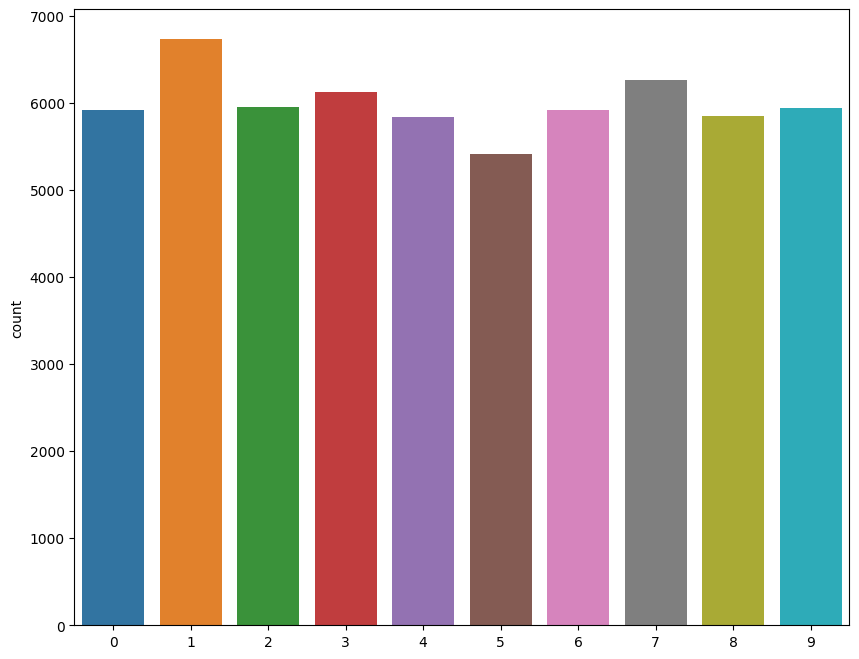

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(x=y_train)

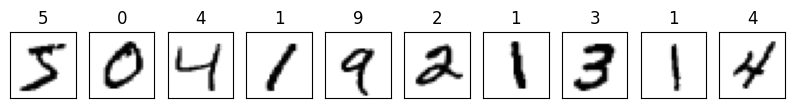

In [ ]:
fig, axes = plt.subplots(ncols=10, sharex=False,
    sharey=True, figsize=(10, 4))
for i in range(10):
    axes[i].set_title(y_train[i])
    axes[i].imshow(x_train[i], cmap='gray_r')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

In [ ]:
print('Training images shape : ',x_train.shape)
print('Testing images shape : ',x_test.shape)

Training images shape :  (60000, 28, 28)
Testing images shape :  (10000, 28, 28)


In [ ]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [ ]:
x_train=x_train/255.0
x_testg=x_test/255.0
num_classes = 10

### Model Building & Testing

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten,Activation
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.layers import BatchNormalization

In [ ]:
model = Sequential()

model.add(Conv2D(128, kernel_size=(3, 3),
                 activation=tf.nn.relu,
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), activation=tf.nn.relu))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(32, (3, 3), activation=tf.nn.relu))
model.add(BatchNormalization())
model.add(Dropout(0.3))


model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation=tf.nn.softmax))

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history=model.fit(x=x_train,
                  y=y_train,
                  validation_split=0.7,
                  epochs=10)

Epoch 1/10
563/563 [==============================] - 421s 739ms/step - loss: 0.1281 - accuracy: 0.9661 - val_loss: 0.1256 - val_accuracy: 0.9759
Epoch 2/10
563/563 [==============================] - 367s 653ms/step - loss: 0.0996 - accuracy: 0.9716 - val_loss: 0.1483 - val_accuracy: 0.9719
Epoch 3/10
563/563 [==============================] - 408s 725ms/step - loss: 0.0782 - accuracy: 0.9759 - val_loss: 0.1412 - val_accuracy: 0.9735
Epoch 4/10
563/563 [==============================] - 401s 711ms/step - loss: 0.0759 - accuracy: 0.9776 - val_loss: 0.1388 - val_accuracy: 0.9769
Epoch 5/10
563/563 [==============================] - 401s 713ms/step - loss: 0.0621 - accuracy: 0.9811 - val_loss: 0.1430 - val_accuracy: 0.9771
Epoch 6/10
563/563 [==============================] - 367s 653ms/step - loss: 0.0589 - accuracy: 0.9822 - val_loss: 0.1629 - val_accuracy: 0.9750
Epoch 7/10
563/563 [==============================] - 395s 703ms/step - loss: 0.0562 - accuracy: 0.9817 - val_loss: 0.1536 -

In [ ]:
model.save('MNproject.h5')

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('MNproject.h5')

In [ ]:
loss_and_acc=model.evaluate(x_test,y_test)
print("Test Loss", loss_and_acc[0])
print("Test Accuracy", loss_and_acc[1])

313/313 [==============================] - 60s 191ms/step - loss: 5.9840 - accuracy: 0.9824
Test Loss 5.9839630126953125
Test Accuracy 0.9824000000953674


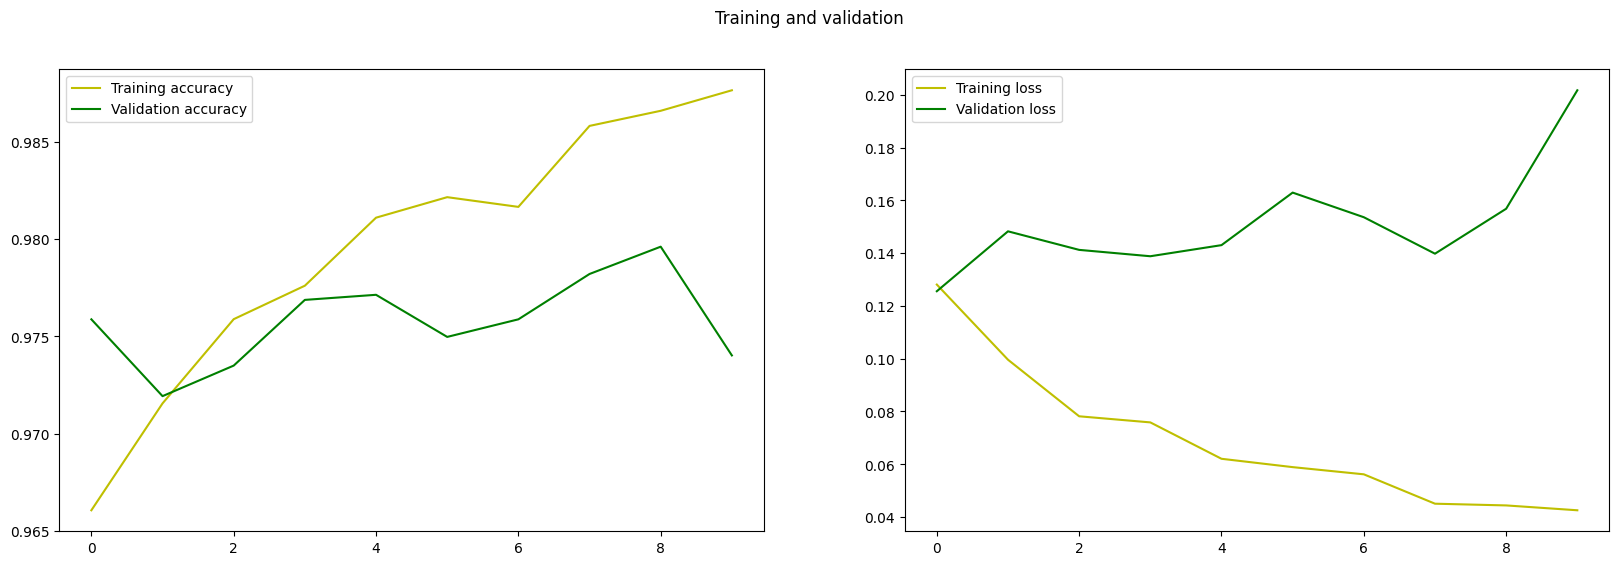

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
ax[0].plot(epochs, acc, 'y', label='Training accuracy')
ax[0].plot(epochs, val_acc, 'g', label='Validation accuracy')
ax[0].legend(loc=0)
ax[1].plot(epochs, loss, 'y', label='Training loss')
ax[1].plot(epochs, val_loss, 'g', label='Validation loss')
ax[1].legend(loc=0)

plt.suptitle('Training and validation')
plt.show()

In [ ]:
y_predicted = model.predict(x_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

313/313 [==============================] - 35s 111ms/step


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 976,    0,    2,    0,    0,    0,    1,    1,    0,    0],
       [   0, 1129,    3,    0,    1,    0,    1,    1,    0,    0],
       [   3,    1, 1017,    0,    4,    0,    2,    2,    3,    0],
       [   0,    0,   17,  974,    0,    5,    1,    1,   10,    2],
       [   0,    0,    0,    0,  975,    0,    3,    0,    2,    2],
       [   2,    1,    0,    3,    0,  867,    8,    1,    8,    2],
       [   8,    2,    0,    0,    5,    0,  942,    0,    1,    0],
       [   0,    4,   14,    1,    3,    0,    0, 1005,    1,    0],
       [   7,    1,    8,    1,    0,    0,    0,    1,  951,    5],
       [   3,    1,    1,    0,    7,    1,    0,    3,    5,  988]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

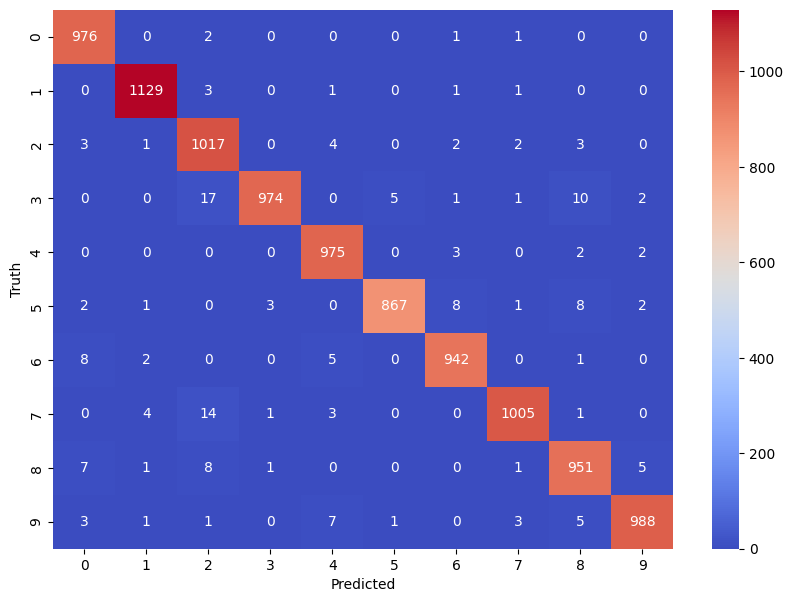

In [ ]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap = 'coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Truth')

313/313 [==============================] - 29s 94ms/step
Predicted Value:  1
Successful prediction


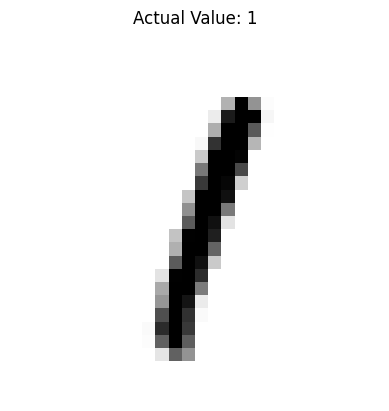

In [ ]:
plt.imshow(x_test[5],cmap='gray_r')
plt.title('Actual Value: {}'.format(y_test[5]))
prediction=model.predict(x_test)

plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[5]))
if(y_test[5]==(np.argmax(prediction[5]))):
  print('Successful prediction')
else:
  print('Unsuccessful prediction')

313/313 [==============================] - 30s 96ms/step
Predicted Value:  0
Successful prediction


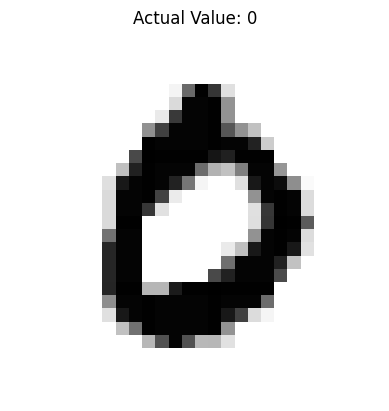

In [ ]:
plt.imshow(x_test[3],cmap='gray_r')
plt.title('Actual Value: {}'.format(y_test[3]))
prediction=model.predict(x_test)
plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[3]))
if(y_test[3]==(np.argmax(prediction[3]))):
  print('Successful prediction')
else:
  print('Unsuccessful prediction')